In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, LeakyReLU, Softmax, Dropout, GRU
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, History, ModelCheckpoint
from keras.optimizers import Adam, RMSprop
import tensorflow as tf
import os
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error, r2_score

In [42]:
sequences = np.load('seq_labels/sequences_pose_all.npy')
labels = np.load('seq_labels/labels_pose_all.npy')
# actions = np.array(['goodbye', 'hi', 'you', 'me', 'thankyou', 'goodmorning'])
# actions = np.array(['come', 'good', 'happy', 'home', 'iloveyou', 'sorry'])
actions = np.array(['come', 'good', 'goodbye', 'goodmorning', 'happy', 'hi', 'home', 'iloveyou', 'me', 'sorry', 'thankyou', 'you'])

In [43]:
np.random.seed(24)
tf.random.set_seed(24)

In [44]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)

In [45]:
xtrain, xrem, ytrain, yrem = train_test_split(X, y, test_size=0.3)

xval, xtest, yval, ytest = train_test_split(xrem, yrem, test_size=0.5)

# xtrain = np.load('data_all/xtrain.npy')
# ytrain = np.load('data_all/ytrain.npy')
# xval = np.load('data_all/xval.npy')
# yval = np.load('data_all/yval.npy')
# xtest = np.load('data_all/xtest.npy')
# ytest = np.load('data_all/ytest.npy')

# xtrain = np.load('data_2/xtrain.npy')
# ytrain = np.load('data_2/ytrain.npy')
# xval = np.load('data_2/xval.npy')
# yval = np.load('data_2/yval.npy')
# xtest = np.load('data_2/xtest.npy')
# ytest = np.load('data_2/ytest.npy')

# xtrain = np.load('data_1/xtrain.npy')
# ytrain = np.load('data_1/ytrain.npy')
# xval = np.load('data_1/xval.npy')
# yval = np.load('data_1/yval.npy')
# xtest = np.load('data_1/xtest.npy')
# ytest = np.load('data_1/ytest.npy')

# xtrain = np.load('data_all_a/xtrain.npy')
# ytrain = np.load('data_all_a/ytrain.npy')
# xval = np.load('data_all_a/xval.npy')
# yval = np.load('data_all_a/yval.npy')
# xtest = np.load('data_all_a/xtest.npy')
# ytest = np.load('data_all_a/ytest.npy')

In [46]:
# np.save('data_all_a/xtrain.npy',xtrain)
# np.save('data_all_a/xval.npy',xval)
# np.save('data_all_a/xtest.npy',xtest)
# np.save('data_all_a/ytrain.npy',ytrain)
# np.save('data_all_a/yval.npy',yval)
# np.save('data_all_a/ytest.npy',ytest)

In [47]:
file_name = 'all_gru_hope_final'

In [48]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
checkpoint_callback = ModelCheckpoint(f'islr_{file_name}.h5', monitor='val_categorical_accuracy', save_best_only=True)
history = History()

In [49]:
callback = EarlyStopping(monitor='val_categorical_accuracy', patience=7, start_from_epoch = 80)

In [50]:
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, input_shape=(30, 258)))
# model.add(LeakyReLU())
# model.add(Dropout(0.4))
# model.add(LSTM(128, return_sequences=True))
# model.add(LeakyReLU())
# model.add(LSTM(64, return_sequences=False))
# model.add(LeakyReLU())
# model.add(Dense(64))
# model.add(LeakyReLU())
# model.add(Dense(32))
# model.add(LeakyReLU())
# model.add(Dense(actions.shape[0]))
# model.add(Softmax())

model = Sequential()
model.add(GRU(64, return_sequences=True, input_shape=(30, 258)))
model.add(LeakyReLU())
model.add(Dropout(0.4))
model.add(GRU(128, return_sequences=True))
model.add(LeakyReLU())
model.add(GRU(64, return_sequences=False))
model.add(LeakyReLU())
model.add(Dense(64))
model.add(LeakyReLU())
model.add(Dense(32))
model.add(LeakyReLU())
model.add(Dense(actions.shape[0]))
model.add(Softmax())

In [51]:
model.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [52]:
history = model.fit(xtrain, ytrain, epochs=100, callbacks=[tb_callback, callback, history, checkpoint_callback], batch_size=32, validation_data=(xval, yval))

Epoch 1/100
36/36 [==============================] - 14s 161ms/step - loss: 2.2944 - categorical_accuracy: 0.1369 - val_loss: 2.1717 - val_categorical_accuracy: 0.1707
Epoch 2/100
36/36 [==============================] - 5s 134ms/step - loss: 2.0273 - categorical_accuracy: 0.2162 - val_loss: 1.9451 - val_categorical_accuracy: 0.1992
Epoch 3/100
36/36 [==============================] - 6s 159ms/step - loss: 1.8899 - categorical_accuracy: 0.2502 - val_loss: 1.8356 - val_categorical_accuracy: 0.2195
Epoch 4/100
36/36 [==============================] - 5s 135ms/step - loss: 1.8013 - categorical_accuracy: 0.2851 - val_loss: 1.7355 - val_categorical_accuracy: 0.3049
Epoch 5/100
36/36 [==============================] - 9s 256ms/step - loss: 1.6084 - categorical_accuracy: 0.3261 - val_loss: 1.4604 - val_categorical_accuracy: 0.4187
Epoch 6/100
36/36 [==============================] - 5s 141ms/step - loss: 1.4431 - categorical_accuracy: 0.3697 - val_loss: 1.5630 - val_categorical_accuracy: 0.32

In [56]:
model.load_weights(f'islr_{file_name}.h5')
# model.load_weights(f'islr_all_gru_6.h5')

In [57]:
train_loss, train_acc = model.evaluate(xtrain, ytrain)
print('Train accuracy: ', train_acc)
print('Train loss: ', train_loss)

36/36 [==============================] - 1s 14ms/step - loss: 0.0742 - categorical_accuracy: 0.9738
Train accuracy:  0.9738448262214661
Train loss:  0.07418226450681686


In [58]:
val_loss, val_acc = model.evaluate(xval, yval)
print('Val accuracy: ', val_acc)
print('Val loss: ', val_loss)

8/8 [==============================] - 0s 28ms/step - loss: 0.2936 - categorical_accuracy: 0.9350
Val accuracy:  0.934959352016449
Val loss:  0.29364487528800964


In [59]:
test_loss, test_acc = model.evaluate(xtest, ytest)

8/8 [==============================] - 0s 13ms/step - loss: 0.2841 - categorical_accuracy: 0.9106


In [30]:
print('Test accuracy: ', test_acc)
print('Test loss: ', test_loss)

Test accuracy:  0.9512194991111755
Test loss:  0.2057509869337082


In [169]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_18 (GRU)                (None, 30, 64)            62208     
                                                                 
 leaky_re_lu_30 (LeakyReLU)  (None, 30, 64)            0         
                                                                 
 dropout_6 (Dropout)         (None, 30, 64)            0         
                                                                 
 gru_19 (GRU)                (None, 30, 128)           74496     
                                                                 
 leaky_re_lu_31 (LeakyReLU)  (None, 30, 128)           0         
                                                                 
 gru_20 (GRU)                (None, 64)                37248     
                                                                 
 leaky_re_lu_32 (LeakyReLU)  (None, 64)               

In [170]:
model.save(f'islr_{file_name}a.h5')

In [31]:
ypred = model.predict(xtest)

8/8 [==============================] - 2s 17ms/step


In [32]:
ytrue = np.argmax(ytest, axis=1).tolist()
ypred = np.argmax(ypred, axis=1).tolist()

In [33]:
cm = confusion_matrix(ytrue,ypred)

In [34]:
cm

array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 24,  1,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0, 23,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1, 22,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 14,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 25,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0, 17,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 15]])

In [35]:
cm_df = pd.DataFrame(cm,
                     index = actions, 
                     columns = actions)

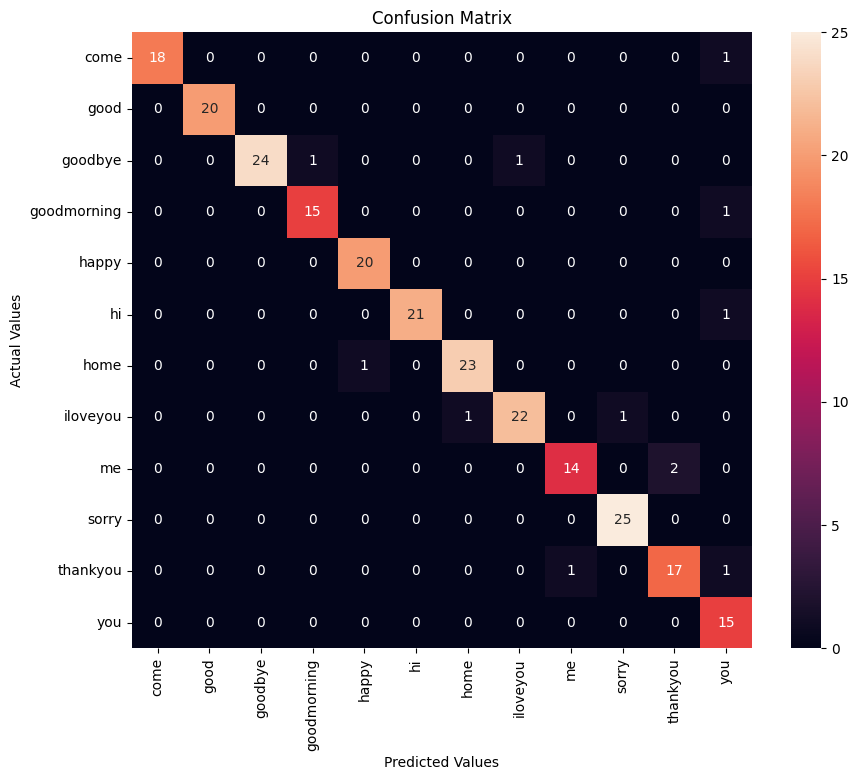

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig(f'graphs/conf_matrix_{file_name}.png')
plt.show()

In [37]:
mcm1 = multilabel_confusion_matrix(ytrue, ypred)
print(mcm1)

[[[227   0]
  [  1  18]]

 [[226   0]
  [  0  20]]

 [[220   0]
  [  2  24]]

 [[229   1]
  [  1  15]]

 [[225   1]
  [  0  20]]

 [[224   0]
  [  1  21]]

 [[221   1]
  [  1  23]]

 [[221   1]
  [  2  22]]

 [[229   1]
  [  2  14]]

 [[220   1]
  [  0  25]]

 [[225   2]
  [  2  17]]

 [[227   4]
  [  0  15]]]


In [38]:
acc = accuracy_score(ytrue, ypred)
rec_w = recall_score(ytrue, ypred, average = 'weighted')
rec_n = recall_score(ytrue, ypred, average = None)
pre_w = precision_score(ytrue, ypred, average = 'weighted')
pre_n = precision_score(ytrue, ypred, average = None)
f1_w = f1_score(ytrue, ypred, average = 'weighted')
f1_n = f1_score(ytrue, ypred, average = None)


print('Accuracy: ', round(acc, 3))
print('Recall (weighted): ', round(rec_w, 3))
print('Precision (weighted): ', round(pre_w, 3))
print('F1 score (weighted): ', round(f1_w, 3))

print('Recall : ', [round(x, 3) for x in rec_n])
print('Precision : ', [round(x, 3) for x in pre_n])
print('F1 score : ', [round(x, 3) for x in f1_n])


Accuracy:  0.951
Recall (weighted):  0.951
Precision (weighted):  0.955
F1 score (weighted):  0.952
Recall :  [0.947, 1.0, 0.923, 0.938, 1.0, 0.955, 0.958, 0.917, 0.875, 1.0, 0.895, 1.0]
Precision :  [1.0, 1.0, 1.0, 0.938, 0.952, 1.0, 0.958, 0.957, 0.933, 0.962, 0.895, 0.789]
F1 score :  [0.973, 1.0, 0.96, 0.938, 0.976, 0.977, 0.958, 0.936, 0.903, 0.98, 0.895, 0.882]


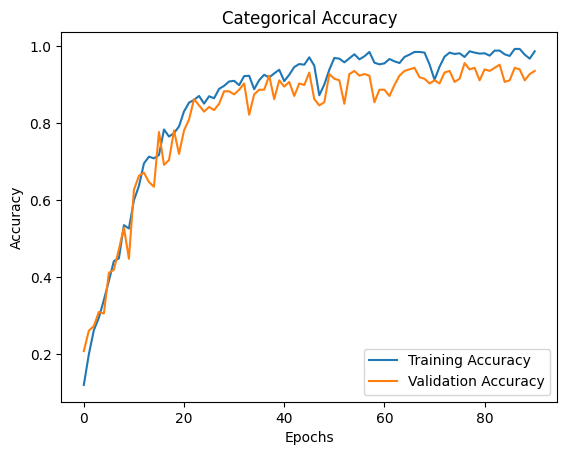

In [39]:
plt.plot(history.history['categorical_accuracy'],label='Training Accuracy')
plt.plot(history.history['val_categorical_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Categorical Accuracy')
plt.legend()
# plt.savefig(f'graphs/accuracy_{file_name}.png')
plt.show()

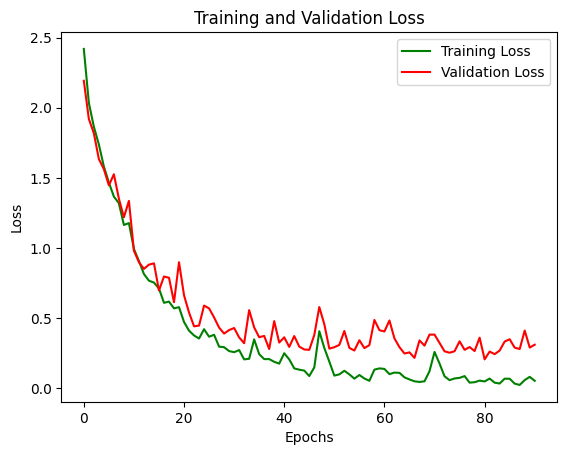

In [40]:
plt.plot(history.history['loss'], color= 'green',label='Training Loss')
plt.plot(history.history['val_loss'], color= 'red', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
# plt.savefig(f'graphs/loss_{file_name}.png')
plt.show()

In [125]:
ep = len(history.history['loss'])
print('Epochs: ', ep)

Epochs:  78


In [126]:
pd.DataFrame(history.history).to_csv(f'graphs/history_{file_name}.csv')

In [127]:
history.history['val_loss']

[2.104569911956787,
 1.8637572526931763,
 1.7375614643096924,
 1.581900954246521,
 1.5680058002471924,
 1.4773410558700562,
 1.4279658794403076,
 1.2516926527023315,
 1.20244300365448,
 1.0843188762664795,
 1.0772087574005127,
 0.9437547922134399,
 0.909915566444397,
 0.7350202202796936,
 0.7127482891082764,
 0.6670671701431274,
 0.6091201901435852,
 0.6323369741439819,
 0.6204915046691895,
 0.586350679397583,
 0.5066723823547363,
 0.5002104043960571,
 0.4381822943687439,
 0.4678034782409668,
 0.44098231196403503,
 0.4035269021987915,
 0.42743781208992004,
 0.4068211615085602,
 0.43626368045806885,
 0.4378588795661926,
 0.41632577776908875,
 0.2973826825618744,
 0.3141438663005829,
 0.35165730118751526,
 0.4418450891971588,
 0.42851585149765015,
 0.30513545870780945,
 0.4968600571155548,
 0.2686057984828949,
 0.2588830888271332,
 0.2312268614768982,
 0.1867186576128006,
 0.24493595957756042,
 0.254291832447052,
 0.2274531126022339,
 0.5079020857810974,
 0.3037414848804474,
 0.333040028

In [60]:
top1_acc = np.mean(np.argmax(model.predict(xtest), axis=1) == np.argmax(ytest, axis=1))
print('Top-1 accuracy:', top1_acc)

k=3
topk_acc = np.mean(np.any(np.argsort(model.predict(xtest), axis=1)[:, -k:] == np.argmax(ytest, axis=1).reshape(-1, 1), axis=1))
print(f'Top-{k} accuracy:', topk_acc)

8/8 [==============================] - 2s 17ms/step
Top-1 accuracy: 0.9105691056910569
8/8 [==============================] - 0s 16ms/step
Top-3 accuracy: 0.9959349593495935
